# DATA PREPARATION

In [172]:
#Importations des librairies
import pandas as pd
import os
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import LogNorm
import seaborn as sns

In [173]:
# Chemin vers notre fichier de training
path = "/Users/idia/Documents/ProjetESILV/PythonData/data-analysis-satellite/sat.trn"

In [174]:
# On vérifie si le chemin existe
assert(os.path.isfile(path))

In [175]:
# Creation de la dataframe
df = pd.read_csv(path, sep = "\s+", header=None)

In [176]:
# On extrait les données et on ajoute le detail des colonnes pour une meilleure compréhension
df.columns = ['top left pixel / spectral band 1','top left pixel / spectral band 2','top left pixel / spectral band 3','top left pixel / spectral band 4','top middle pixel / spectral band 1','top middle pixel / spectral band 2','top middle pixel / spectral band 3','top middle pixel / spectral band 4','top right pixel  / spectral band 1','top right pixel / spectral band 2','top right pixel / spectral band 3','top right pixel / spectral band 4','middle left pixel / spectral band 1','middle left pixel / spectral band 2','middle left pixel / spectral band 3','middle left pixel / spectral band 4','center pixel / spectral band 1',' center pixel / spectral band 2','center pixel / spectral band 3','center pixel / spectral band 4','middle right pixel / spectral band 1','middle right pixel / spectral band 2','middle right pixel / spectral band 3','middle right pixel / spectral band 4','bottom left pixel / spectral band 1','bottom left pixel / spectral band 2','bottom left pixel / spectral band 3','bottom left pixel / spectral band 4','bottom middle pixel / spectral band 1','bottom middle pixel / spectral band 2','bottom middle pixel / spectral band 3','bottom middle pixel / spectral band 4','bottom right pixel / spectral band 1','bottom right pixel / spectral band 2','bottom right pixel / spectral band 3','bottom right pixel / spectral band 4','Class']
df.head()

,top left pixel / spectral band 1,top left pixel / spectral band 2,top left pixel / spectral band 3,top left pixel / spectral band 4,top middle pixel / spectral band 1,top middle pixel / spectral band 2,top middle pixel / spectral band 3,top middle pixel / spectral band 4,top right pixel / spectral band 1,top right pixel / spectral band 2,...,bottom left pixel / spectral band 4,bottom middle pixel / spectral band 1,bottom middle pixel / spectral band 2,bottom middle pixel / spectral band 3,bottom middle pixel / spectral band 4,bottom right pixel / spectral band 1,bottom right pixel / spectral band 2,bottom right pixel / spectral band 3,bottom right pixel / spectral band 4,Class
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3


In [177]:
# On traduit l'élément class en ajoutant une case "type de sol" et en faisant la conversion appropriée
typeofsoils = {1 : "red soil", 2 : "cotton crop", 3 : "grey soil", 4 : "damp grey soil", 5 : "soil with vegetable", 7 : "very damp grey soil"}
df["typeofsoil"] = df["Class"]
df["typeofsoil"] = df.Class.map(typeofsoils)
df.head(10)

,top left pixel / spectral band 1,top left pixel / spectral band 2,top left pixel / spectral band 3,top left pixel / spectral band 4,top middle pixel / spectral band 1,top middle pixel / spectral band 2,top middle pixel / spectral band 3,top middle pixel / spectral band 4,top right pixel / spectral band 1,top right pixel / spectral band 2,...,bottom middle pixel / spectral band 1,bottom middle pixel / spectral band 2,bottom middle pixel / spectral band 3,bottom middle pixel / spectral band 4,bottom right pixel / spectral band 1,bottom right pixel / spectral band 2,bottom right pixel / spectral band 3,bottom right pixel / spectral band 4,Class,typeofsoil
0,92,115,120,94,84,102,106,79,84,102,...,88,121,128,100,84,107,113,87,3,grey soil
1,84,102,106,79,84,102,102,83,80,102,...,84,107,113,87,84,99,104,79,3,grey soil
2,84,102,102,83,80,102,102,79,84,94,...,84,99,104,79,84,99,104,79,3,grey soil
3,80,102,102,79,84,94,102,79,80,94,...,84,99,104,79,84,103,104,79,3,grey soil
4,84,94,102,79,80,94,98,76,80,102,...,84,103,104,79,79,107,109,87,3,grey soil
5,80,94,98,76,80,102,102,79,76,102,...,79,107,109,87,79,107,109,87,3,grey soil
6,76,102,106,83,76,102,106,87,80,98,...,79,103,104,83,79,103,104,79,3,grey soil
7,76,102,106,87,80,98,106,79,76,94,...,79,103,104,79,79,95,100,79,3,grey soil
8,76,89,98,76,76,94,98,76,76,98,...,75,91,96,71,79,87,93,71,4,damp grey soil
9,76,94,98,76,76,98,102,72,76,94,...,79,87,93,71,79,87,93,67,4,damp grey soil


# Data Visualisation

In [178]:
df.shape

(4435, 38)

In [179]:
df.columns

Index(['top left pixel / spectral band 1', 'top left pixel / spectral band 2',
       'top left pixel / spectral band 3', 'top left pixel / spectral band 4',
       'top middle pixel / spectral band 1',
       'top middle pixel / spectral band 2',
       'top middle pixel / spectral band 3',
       'top middle pixel / spectral band 4',
       'top right pixel  / spectral band 1',
       'top right pixel / spectral band 2',
       'top right pixel / spectral band 3',
       'top right pixel / spectral band 4',
       'middle left pixel / spectral band 1',
       'middle left pixel / spectral band 2',
       'middle left pixel / spectral band 3',
       'middle left pixel / spectral band 4', 'center pixel / spectral band 1',
       ' center pixel / spectral band 2', 'center pixel / spectral band 3',
       'center pixel / spectral band 4',
       'middle right pixel / spectral band 1',
       'middle right pixel / spectral band 2',
       'middle right pixel / spectral band 3',
       'm

In [180]:
df.sort_values(["Class"])

,top left pixel / spectral band 1,top left pixel / spectral band 2,top left pixel / spectral band 3,top left pixel / spectral band 4,top middle pixel / spectral band 1,top middle pixel / spectral band 2,top middle pixel / spectral band 3,top middle pixel / spectral band 4,top right pixel / spectral band 1,top right pixel / spectral band 2,...,bottom middle pixel / spectral band 1,bottom middle pixel / spectral band 2,bottom middle pixel / spectral band 3,bottom middle pixel / spectral band 4,bottom right pixel / spectral band 1,bottom right pixel / spectral band 2,bottom right pixel / spectral band 3,bottom right pixel / spectral band 4,Class,typeofsoil
3925,63,106,114,90,60,92,105,87,53,84,...,68,99,108,85,56,91,104,88,1,red soil
3610,53,73,90,79,57,73,90,76,57,77,...,59,95,109,87,63,99,113,92,1,red soil
3611,57,73,90,76,57,77,98,76,57,81,...,63,99,113,92,67,99,109,87,1,red soil
3612,57,77,98,76,57,81,98,83,57,85,...,67,99,109,87,63,95,104,87,1,red soil
3613,57,81,98,83,57,85,98,79,57,85,...,63,95,104,87,63,95,109,87,1,red soil
3614,57,85,98,79,57,85,98,83,53,85,...,63,95,109,87,67,95,100,87,1,red soil
3615,57,85,98,83,53,85,102,79,57,85,...,67,95,100,87,67,95,104,87,1,red soil
3616,53,85,98,83,57,89,106,87,60,94,...,63,95,113,87,59,95,113,92,1,red soil
3617,57,89,106,87,60,94,102,87,60,98,...,59,95,113,92,59,91,104,87,1,red soil
3618,60,94,102,87,60,98,111,87,60,94,...,59,91,104,87,55,87,104,87,1,red soil


In [ ]:
# On peut apercevoir qu'il y a plus de sol rouge (red soil)
df.groupby(["typeofsoil"]).size().reset_index(name="counts")

,typeofsoil,counts
0,cotton crop,479
1,damp grey soil,415
2,grey soil,961
3,red soil,1072
4,soil with vegetable,470
5,very damp grey soil,1038


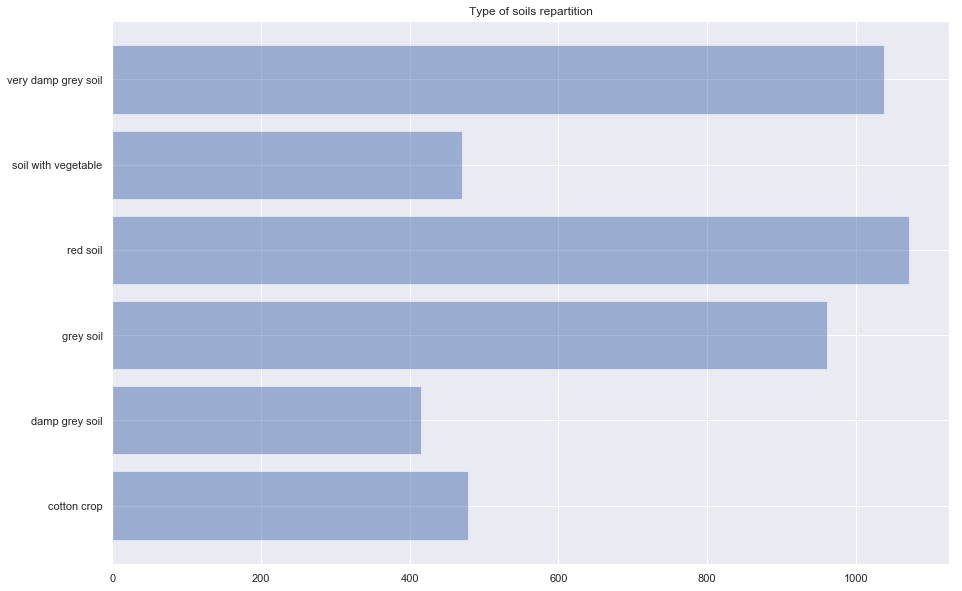

In [ ]:
# On peut aussi avoir une vue graphique de la répartition de type de sols
group_by = df.groupby(['typeofsoil']).size().reset_index(name='counts')
types = group_by['typeofsoil']
count_by_type = group_by['counts']
y_pos = np.arange(len(types))
plt.figure(figsize=(15,10))
plt.barh(y_pos, count_by_type, align='center', alpha=0.5)
plt.yticks(y_pos, types)
plt.title('Type of soils repartition')
plt.show()

In [ ]:
df_train = pd.read_csv(path, sep = "\s+", names = df, index_col = False)
df_train = df_train[['center pixel / spectral band 1',' center pixel / spectral band 2','center pixel / spectral band 3','center pixel / spectral band 4','Class']]
df_train.head()
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, 4].values

C:\Users\idia\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\io\parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


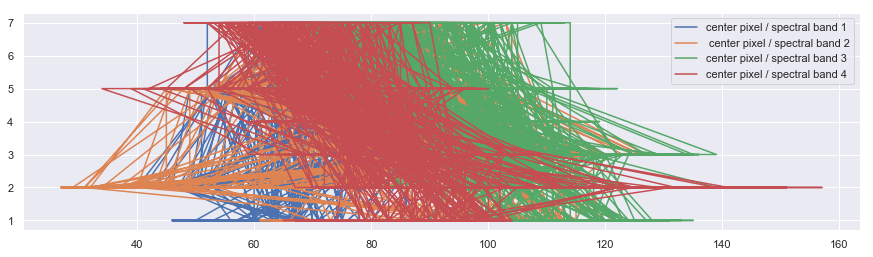

In [ ]:
plt.plot(X_train, y_train)
plt.legend(['center pixel / spectral band 1',' center pixel / spectral band 2','center pixel / spectral band 3','center pixel / spectral band 4'])
plt.show()

In [ ]:
# Heatmap
group_by = df.groupby(['typeofsoil', 'center pixel / spectral band 1']).size().reset_index(name="count")
group_by = group_by.sort_values(by=['typeofsoil', 'center pixel / spectral band 1'])

soil_type_unique = group_by['typeofsoil'].unique()
pixel_nb_unique = group_by['center pixel / spectral band 1'].unique()

In [ ]:
max_size = 0
sizes = np.zeros(soil_type_unique.size)

for i, type_Y in enumerate(soil_type_unique):
    size = 0
    for line in group_by['typeofsoil']:
        if (line == type_Y):
            size = size + 1
    sizes[i] = size
    if (size > max_size):
        max_size = size

In [ ]:
res = np.zeros((soil_type_unique.size,max_size))    
for i_type, type_Y in enumerate(soil_type_unique):
    nb_time = 0
    for i in range(max_size):
        if (i < sizes[i_type]):
            res[i_type][i] = group_by['count'][nb_time]
            nb_time = nb_time + 1
        else:
            res[i_type][i] = 0

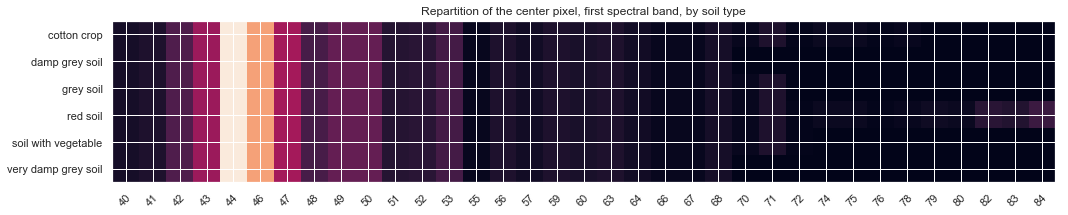

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
im = ax.imshow(res)


pixel_nb_unique = pixel_nb_unique[:35]
ax.set_xticks(np.arange(len(pixel_nb_unique)))
ax.set_yticks(np.arange(len(soil_type_unique)))

ax.set_xticklabels(pixel_nb_unique)
ax.set_yticklabels(soil_type_unique)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("Repartition of the center pixel, first spectral band, by soil type")
fig.tight_layout()
plt.show()

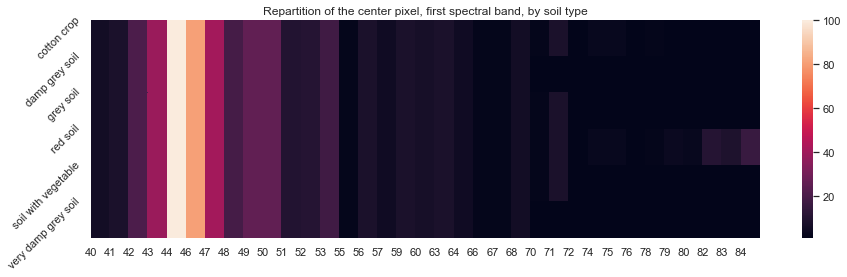

In [ ]:
res[res==0] = 1

max = res.max().max()
min = res.max().max()

sns.set(rc={'figure.figsize':(15,4)})

ax = sns.heatmap(res)

ax.set_xticks(np.arange(len(pixel_nb_unique)))
ax.set_yticks(np.arange(len(soil_type_unique)))

ax.set_xticklabels(pixel_nb_unique)
ax.set_yticklabels(soil_type_unique)

plt.setp(ax.get_yticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

ax.set_title("Repartition of the center pixel, first spectral band, by soil type");

# Modélisation

In [ ]:
# On retire les colonnes à trouver soit "Classe" et "typeofsoil" 
cl_y = "Class"
cl_y_type = "typeofsoil"
X = df.drop({cl_y, cl_y_type}, axis="columns")
Y = df[cl_y]


In [ ]:
X.head(10)

,top left pixel / spectral band 1,top left pixel / spectral band 2,top left pixel / spectral band 3,top left pixel / spectral band 4,top middle pixel / spectral band 1,top middle pixel / spectral band 2,top middle pixel / spectral band 3,top middle pixel / spectral band 4,top right pixel / spectral band 1,top right pixel / spectral band 2,...,bottom left pixel / spectral band 3,bottom left pixel / spectral band 4,bottom middle pixel / spectral band 1,bottom middle pixel / spectral band 2,bottom middle pixel / spectral band 3,bottom middle pixel / spectral band 4,bottom right pixel / spectral band 1,bottom right pixel / spectral band 2,bottom right pixel / spectral band 3,bottom right pixel / spectral band 4
0,92,115,120,94,84,102,106,79,84,102,...,134,104,88,121,128,100,84,107,113,87
1,84,102,106,79,84,102,102,83,80,102,...,128,100,84,107,113,87,84,99,104,79
2,84,102,102,83,80,102,102,79,84,94,...,113,87,84,99,104,79,84,99,104,79
3,80,102,102,79,84,94,102,79,80,94,...,104,79,84,99,104,79,84,103,104,79
4,84,94,102,79,80,94,98,76,80,102,...,104,79,84,103,104,79,79,107,109,87
5,80,94,98,76,80,102,102,79,76,102,...,104,79,79,107,109,87,79,107,109,87
6,76,102,106,83,76,102,106,87,80,98,...,113,87,79,103,104,83,79,103,104,79
7,76,102,106,87,80,98,106,79,76,94,...,104,83,79,103,104,79,79,95,100,79
8,76,89,98,76,76,94,98,76,76,98,...,96,75,75,91,96,71,79,87,93,71
9,76,94,98,76,76,98,102,72,76,94,...,96,71,79,87,93,71,79,87,93,67


In [ ]:
# Voici les éléments que nous souhaitons prédire on veut savoir a partir des données isolées le type de sols appartenant à un groupe de pixels
Y.head()

0    3
1    3
2    3
3    3
4    3
Name: Class, dtype: int64

In [ ]:
# Il faut séparer le dataset (70/30) pour entrainer le modèle et prédire les résultats de la colonne Y
Y
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 )
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size=0.05)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test  = scaler.transform(x_test)
x_train.shape, x_validation.shape, y_train.shape, y_validation.shape, x_test.shape, y_test.shape

C:\Users\idia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\idia\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  import sys
C:\Users\idia\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


((2948, 36), (156, 36), (2948,), (156,), (1331, 36), (1331,))

In [ ]:
hyperparameters = {"n_estimators": 30,
                   "n_jobs": -1}

algo = RandomForestRegressor(**hyperparameters)
modele = algo.fit(x_train, y_train)
modele.score(x_test, y_test)

In [ ]:
svr = svm.SVR(kernel='linear')
modele2 = svr.fit(x_train, y_train)
modele2.score(x_test, y_test)

0.6935130706781667

In [ ]:
algo3 = GaussianNB()
modele3 = algo3.fit(x_train, y_train)
modele3.score(x_test, y_test)

0.7911344853493614

In [ ]:
algo4 = DecisionTreeClassifier()
modele4= algo4.fit(x_train, y_train)
modele4.score(x_test, y_test)

0.8437265214124718

In [ ]:
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'auto_deprecated',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
parameters = {  'gamma' : [0.01, 0.1, 0.5]           }
grid       = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(x_train, y_train)
print (grid.best_score_, grid.best_estimator_) 

C:\Users\idia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


0.882927413977778 SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [ ]:
# On obtient un meilleur score en modifiant les hyperparametres  
parameters = {  'C'      : [1.5, 2, 2.5]   ,
                'kernel' : ['rbf', 'poly', 'sigmoid'],
                'gamma'  : [ 0.05, 0.10, 0.15] }
grid = GridSearchCV(svm.SVR(), parameters, n_jobs=-1)
grid.fit(x_train, y_train)
print (grid.best_score_, grid.best_estimator_)

C:\Users\idia\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [ ]:
print(modele.feature_importances_)
plt.bar(range(len(modele.feature_importances_)), modele.feature_importances_)
plt.title("Importance des features")
plt.show()